In [190]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Reshape, Dropout, LayerNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

import pandas as pd

In [191]:
df = pd.read_csv('AIerror_ONU16_15S_Cycle&Ai&Grantold.csv', usecols=[1], engine='python')
df.head()

,Ai
0,906
1,472
2,906
3,472
4,906


In [192]:
df = df.values
df = df.astype('float32')

In [193]:
df2 = []

for i in range(len(df)):
    if(df[i] > 195000.0):
        df[i] = 195000.0
    df2.append(df[i])

In [194]:
df = df2

In [195]:
df = df[:2000]
print(len(df))

2000


In [196]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

In [197]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1600 400


In [198]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [199]:
# reshape into X=t and Y=t+1
look_back = 50 #16
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [200]:
print(trainX.shape[0])
print(trainX.shape[1])

1549
50


In [201]:
# reshape input to be [samples, time steps, features]
print(trainX.shape[1])
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
#trainX = np.reshape(trainX, (trainX.shape[0], 1, 5)) #trainX.shape[1]
#testX = np.reshape(testX, (testX.shape[0], 1, 5))
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

50
(1549, 50, 1)
(1549,)
(349, 50, 1)
(349,)


In [11]:
# reshape input to be [samples, time steps, features]
print(trainX.shape[1])
#trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
#testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX = np.reshape(trainX, (trainX.shape[0], 2, 5)) #trainX.shape[1]
testX = np.reshape(testX, (testX.shape[0], 2, 5))
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

10
(789, 2, 5)
(789,)
(189, 2, 5)
(189,)


In [202]:
# create and fit the LSTM network
'''
model = Sequential()
#model.add(LSTM(40, input_shape=(1, look_back)))
model.add(LSTM(40, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=1) #64 & 128
'''
#timesteps_ = look_back

inputs = Input(shape=(look_back,))
#inputs = LayerNormalization(axis=1)(inputs)
tgt1 = tf.keras.layers.Reshape((look_back,1),input_shape=(look_back,))(inputs)

#tgt1 = LSTM(units=40,return_sequences = True,input_shape=(look_back,1))(tgt1)
#tgt1 = Dropout(0.2)(tgt1)

#tgt2 = LSTM(units=40,return_sequences = True)(tgt1)
#tgt2 = Dropout(0.2)(tgt2)

#tgt3 = LSTM(units=40,return_sequences = True)(tgt2)
#tgt3 = Dropout(0.2)(tgt3)

tgt1 = LSTM(units=100)(tgt1)
#tgt4 = Dropout(0.2)(tgt4)

predictions = Dense(1)(tgt1)

model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['mse','mae'])

history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_split=0.3) #[1,0,0], [0,0,1]

Epoch 1/100
17/17 [==============================] - 0s 24ms/step - loss: 0.0489 - mse: 0.0097 - mae: 0.0489 - val_loss: 0.0428 - val_mse: 0.0071 - val_mae: 0.0428
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0470 - mse: 0.0092 - mae: 0.0470 - val_loss: 0.0411 - val_mse: 0.0071 - val_mae: 0.0411
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0463 - mse: 0.0093 - mae: 0.0463 - val_loss: 0.0411 - val_mse: 0.0071 - val_mae: 0.0411
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0458 - mse: 0.0091 - mae: 0.0458 - val_loss: 0.0391 - val_mse: 0.0074 - val_mae: 0.0391
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0463 - mse: 0.0093 - mae: 0.0463 - val_loss: 0.0392 - val_mse: 0.0072 - val_mae: 0.0392
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0457 - mse: 0.0092 - mae: 0.0457 - val_loss: 0.0390 - val_mse: 0.0071 - val_mae: 0.0390
Epoch 7/100
17/17 [==

17/17 [==============================] - 0s 5ms/step - loss: 0.0446 - mse: 0.0089 - mae: 0.0446 - val_loss: 0.0384 - val_mse: 0.0068 - val_mae: 0.0384
Epoch 52/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0450 - mse: 0.0088 - mae: 0.0450 - val_loss: 0.0393 - val_mse: 0.0067 - val_mae: 0.0393
Epoch 53/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0448 - mse: 0.0089 - mae: 0.0448 - val_loss: 0.0377 - val_mse: 0.0068 - val_mae: 0.0377
Epoch 54/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0449 - mse: 0.0087 - mae: 0.0449 - val_loss: 0.0387 - val_mse: 0.0070 - val_mae: 0.0387
Epoch 55/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0455 - mse: 0.0089 - mae: 0.0455 - val_loss: 0.0378 - val_mse: 0.0069 - val_mae: 0.0378
Epoch 56/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0450 - mse: 0.0090 - mae: 0.0450 - val_loss: 0.0385 - val_mse: 0.0069 - val_mae: 0.0385
Epoch 57/100
17/17 [=========

look_back = 5, timesteps = 1, feature = 5

In [12]:
#batch_size = 64
from sklearn.metrics import mean_squared_error as mse
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mse(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 21433.22 RMSE
Test Score: 23416.14 RMSE
Train Score: 92.91 RMAE
Test Score: 99.28 RMAE


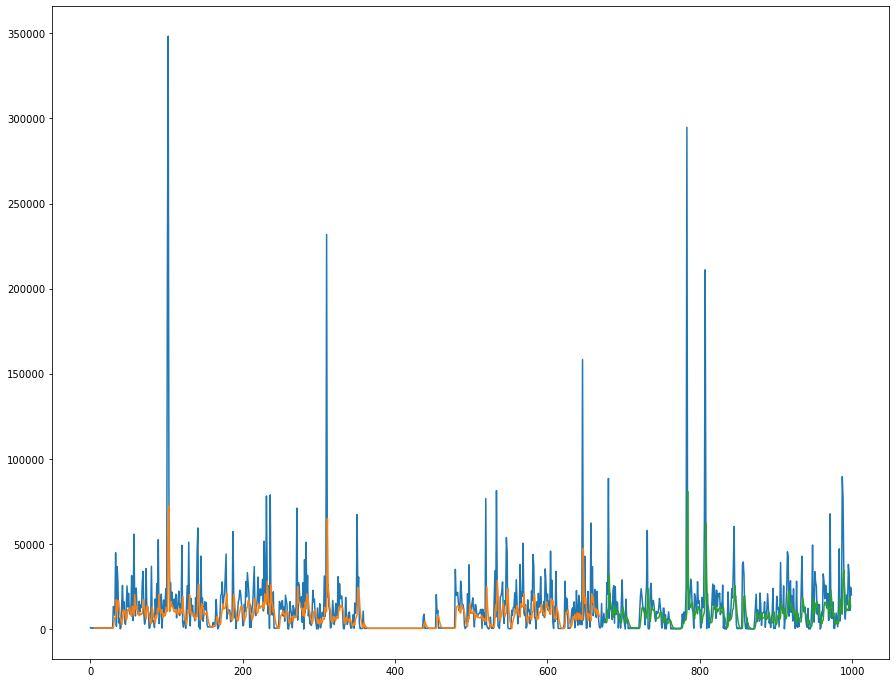

In [13]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 12))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [14]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
reshape (Reshape)            (None, 5, 1)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 40)                6720      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 6,761
Trainable params: 6,761
Non-trainable params: 0
_________________________________________________________________


look_back = 5, timesteps = 5, feature = 1

In [36]:
#batch_size = 64
from sklearn.metrics import mean_squared_error as mse
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mse(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 21402.58 RMSE
Test Score: 23379.40 RMSE
Train Score: 93.05 RMAE
Test Score: 99.21 RMAE


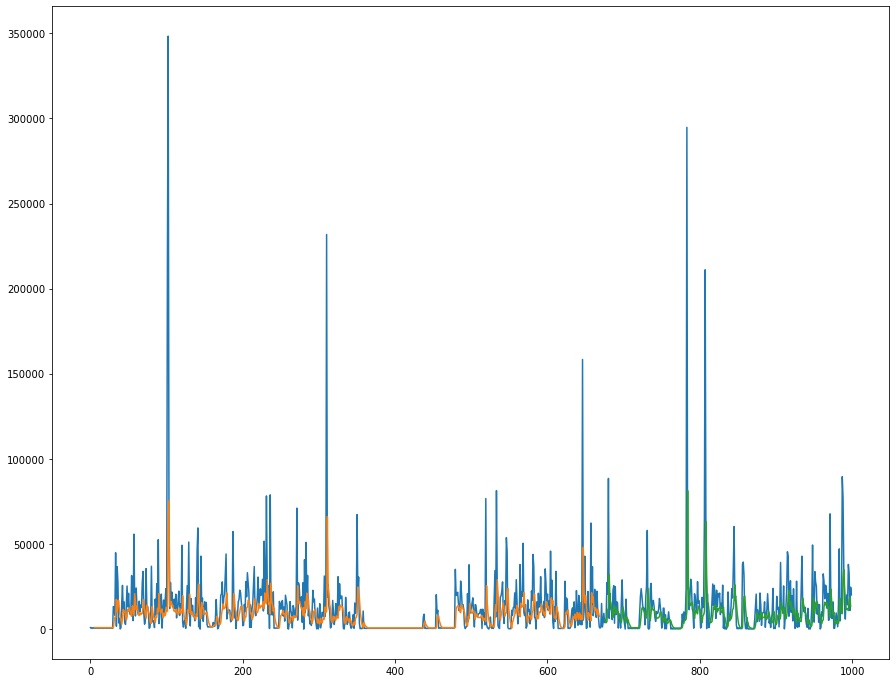

In [37]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 12))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

look_back = 10, timesteps = 10, feature = 1

In [203]:
from sklearn.metrics import mean_squared_error as mse
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mse(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 17741.71 RMSE
Test Score: 20858.55 RMSE
Train Score: 90.69 RMAE
Test Score: 97.38 RMAE


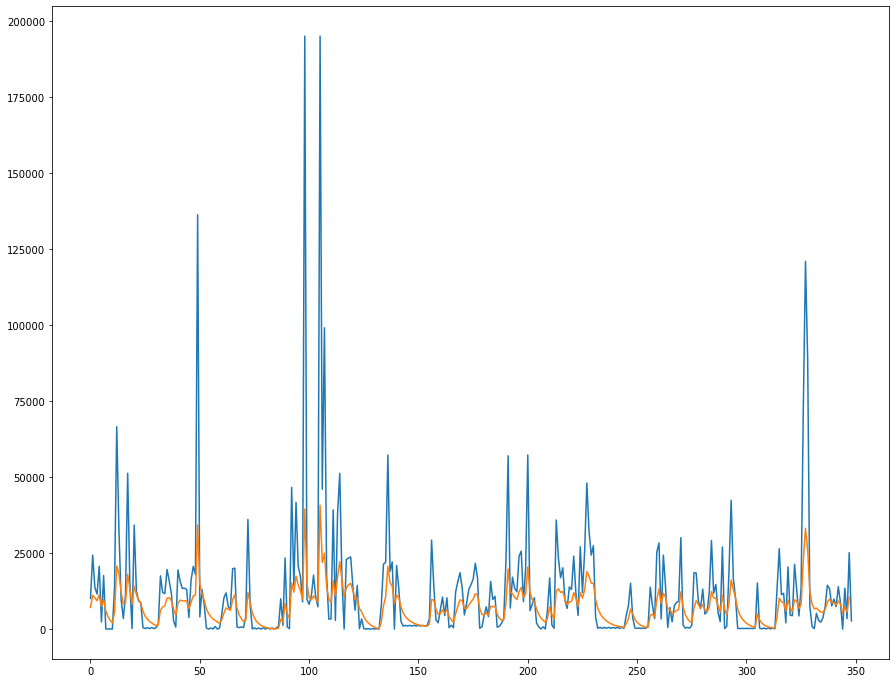

In [204]:
# shift train predictions for plotting
#trainPredictPlot = np.empty_like(dataset)
#trainPredictPlot[:, :] = np.nan
#trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 12))
#plt.plot(scaler.inverse_transform(dataset))
plt.plot(testY[0])
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot[1651:])
plt.show()
#testPredict
#testPredictPlot

In [205]:
model.summary()

Model: "functional_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 50)]              0         
_________________________________________________________________
reshape_14 (Reshape)         (None, 50, 1)             0         
_________________________________________________________________
lstm_50 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
